## **Exploratory Data Analysis (EDA):**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [28]:
df_train=pd.read_csv("/content/Titanic_train.csv")


In [29]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


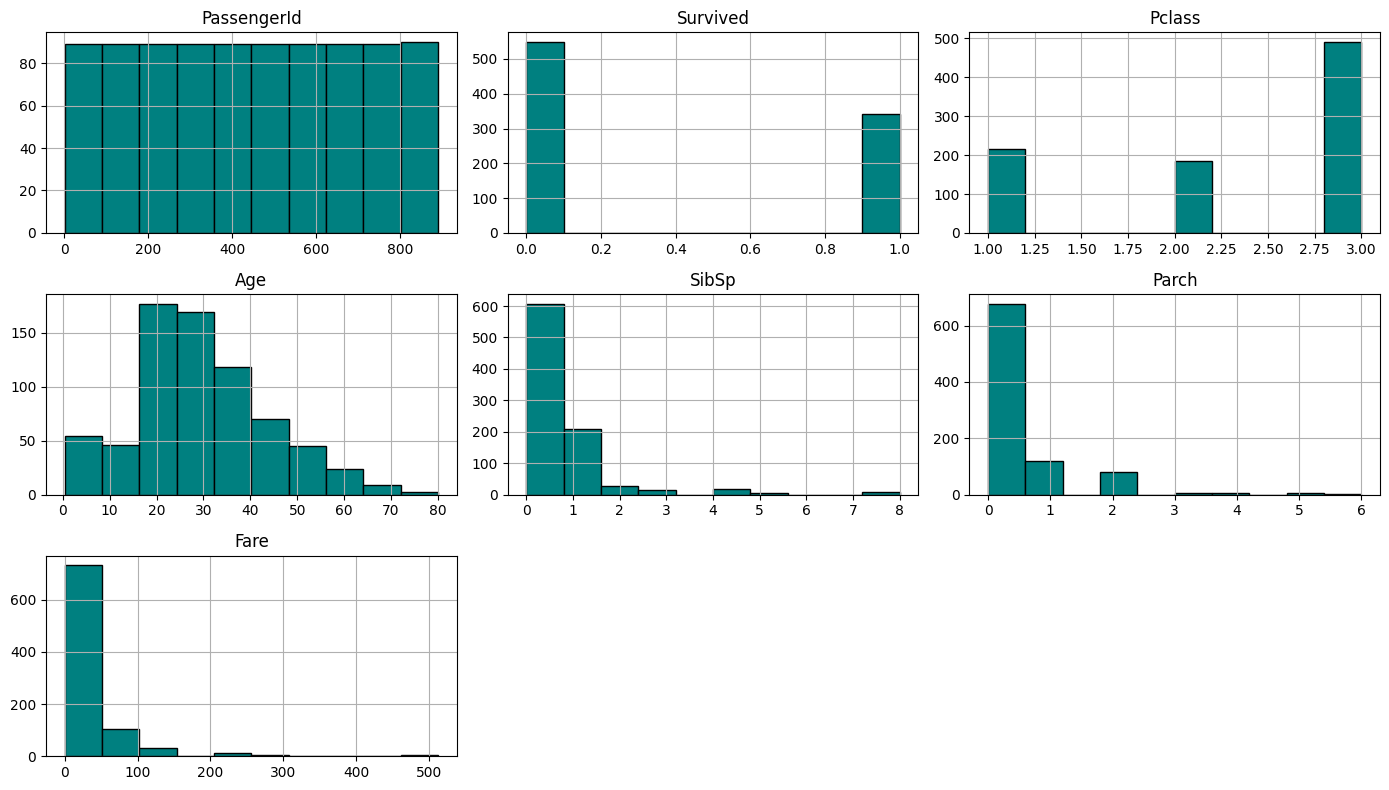

In [34]:
df_train.hist(bins=10,color='teal',edgecolor='black',figsize=(14,8))
plt.tight_layout()
plt.show()

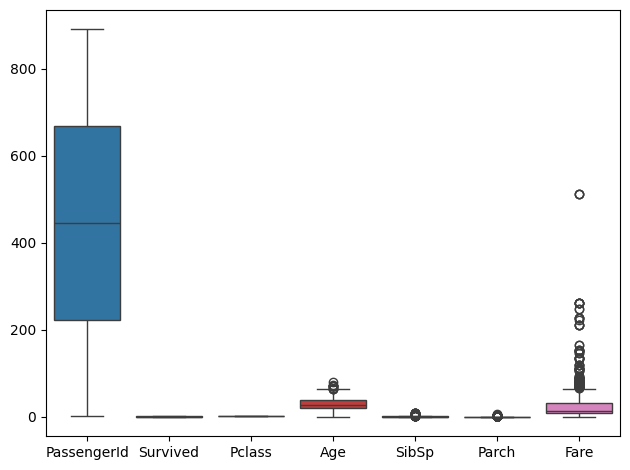

In [35]:
sns.boxplot(data=df_train)
plt.tight_layout()
plt.show()

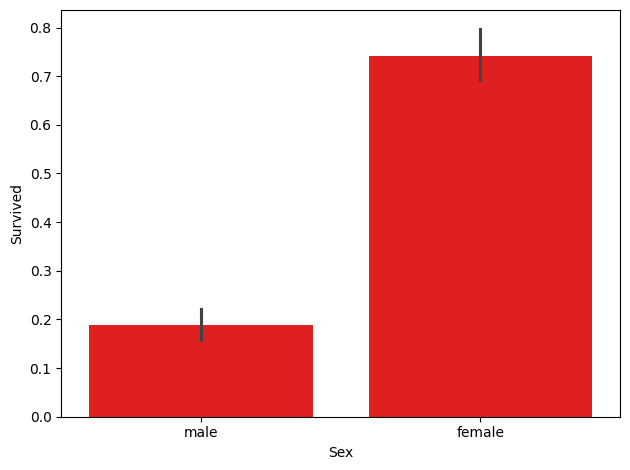

In [36]:
sns.barplot(x="Sex",y="Survived",data=df_train,color='red')
plt.tight_layout()
plt.show()

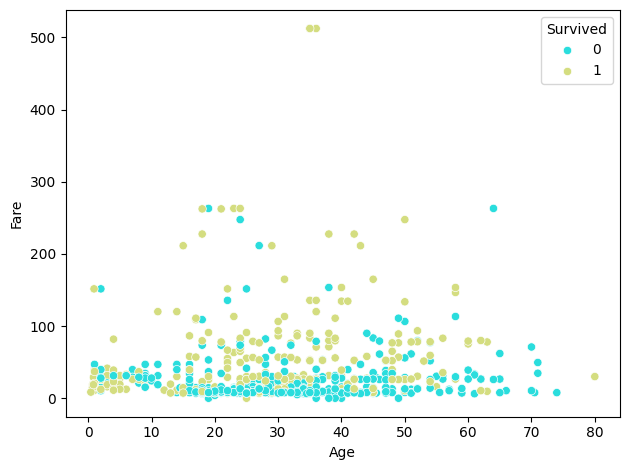

In [37]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df_train,palette="rainbow")
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [38]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
df_train["Age"].fillna(df_train["Age"].median(),inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df_train=pd.get_dummies(df_train,columns=['Sex','Embarked'])
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,False,True,True,False,False


In [41]:
# drop unneccessary columns
df_train.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [42]:
x=df_train.drop(["Survived"],axis=1)
y=df_train["Survived"]

In [43]:
scaler=StandardScaler()
x1=scaler.fit_transform(x)


In [44]:
x=pd.DataFrame(x1,columns=x.columns)



In [45]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.730108,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.726220,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-1.722332,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.718444,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,-1.714556,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,1.718444,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,1.722332,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,1.726220,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
30,-1.613471,-1.566107,0.817561,-0.474545,-0.473674,-0.090272,-0.737695,0.737695,2.074505,-0.307562,-1.623803
10,-1.691229,0.827377,-1.949034,0.432793,0.767630,-0.312172,1.355574,-1.355574,-0.482043,-0.307562,0.615838
873,1.664014,0.827377,1.355510,-0.474545,-0.473674,-0.467209,-0.737695,0.737695,-0.482043,-0.307562,0.615838
182,-1.022513,0.827377,-1.564784,3.154809,2.008933,-0.016444,-0.737695,0.737695,-0.482043,-0.307562,0.615838
876,1.675678,0.827377,-0.719436,-0.474545,-0.473674,-0.450180,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
534,0.346022,0.827377,0.049062,-0.474545,-0.473674,-0.474005,1.355574,-1.355574,-0.482043,-0.307562,0.615838
584,0.540416,0.827377,-0.104637,-0.474545,-0.473674,-0.472998,-0.737695,0.737695,2.074505,-0.307562,-1.623803
493,0.186618,-1.566107,3.199906,-0.474545,-0.473674,0.348330,-0.737695,0.737695,2.074505,-0.307562,-1.623803
527,0.318806,-1.566107,-0.104637,-0.474545,-0.473674,3.817033,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [48]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
707,1.018625,-1.566107,0.971260,-0.474545,-0.473674,-0.119131,-0.737695,0.737695,-0.482043,-0.307562,0.615838
37,-1.586256,0.827377,-0.642586,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
615,0.660940,-0.369365,-0.412037,0.432793,2.008933,0.660333,1.355574,-1.355574,-0.482043,-0.307562,0.615838
169,-1.073056,0.827377,-0.104637,-0.474545,-0.473674,0.489104,-0.737695,0.737695,-0.482043,-0.307562,0.615838
68,-1.465732,0.827377,-0.949986,3.154809,2.008933,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
89,-1.384086,0.827377,-0.412037,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
80,-1.419077,0.827377,-0.565736,-0.474545,-0.473674,-0.467209,-0.737695,0.737695,-0.482043,-0.307562,0.615838
846,1.559041,0.827377,-0.104637,6.784163,2.008933,0.751946,-0.737695,0.737695,-0.482043,-0.307562,0.615838
870,1.652350,0.827377,-0.258337,-0.474545,-0.473674,-0.489442,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [49]:
y_train

,Survived
30,0
10,1
873,0
182,0
876,0
...,...
534,0
584,0
493,0
527,0


In [50]:
y_test

,Survived
707,1
37,0
615,1
169,0
68,1
...,...
89,0
80,0
846,0
870,0


## **Building Predictive Models**

In [51]:
import xgboost
import lightgbm
import lightgbm as LGBMClassifier
import xgboost as XGBClassifier


In [52]:
params={
    'n_estimators':[90,110,150],
    'learning_rate':[0.5,0.7,1],
    'lambda':[1,2,3],
    'max_depth':[3,7,11]
}

In [53]:
grid1=GridSearchCV(xgboost.XGBClassifier(),param_grid=params,verbose=1)
grid1.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [54]:
grid1.best_params_

{'lambda': 3, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [55]:
grid2=GridSearchCV(lightgbm.LGBMClassifier(),param_grid=params,verbose=1)
grid2.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [56]:
grid2.best_params_

{'lambda': 2, 'learning_rate': 0.5, 'max_depth': 11, 'n_estimators': 90}

In [57]:
xgb_model=xgboost.XGBClassifier(reg_lambda= 3, learning_rate= 0.7, max_depth= 3, n_estimators=90)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
pred1=xgb_model.predict(x_test)
pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [59]:
lgb_model=lightgbm.LGBMClassifier(reg_lambda= 2, learning_rate= 0.5, max_depth= 3, n_estimators=110)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369382 -> initscore=-0.534869
[LightGBM] [Info] Start training from score -0.534869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.5, max_depth=3, n_estimators=110, reg_lambda=2)

In [60]:
pred2=lgb_model.predict(x_test)
pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [61]:
# evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} - Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"{model_name} - Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"{model_name} - Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"{model_name} - F1 Score: {f1_score(y_true, y_pred):.2f}")

evaluate_model(y_test, pred2, 'LightGBM')
evaluate_model(y_test, pred1, 'XGBoost')

LightGBM - Accuracy: 0.75
LightGBM - Precision: 0.80
LightGBM - Recall: 0.59
LightGBM - F1 Score: 0.68
XGBoost - Accuracy: 0.75
XGBoost - Precision: 0.79
XGBoost - Recall: 0.58
XGBoost - F1 Score: 0.67


## **Comparative Analysis**

In [62]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, pred2), accuracy_score(y_test, pred1)],
    'Precision': [precision_score(y_test, pred2), precision_score(y_test, pred1)],
    'Recall': [recall_score(y_test, pred2), recall_score(y_test, pred1)],
    'F1 Score': [f1_score(y_test, pred2), f1_score(y_test, pred1)]
})

In [63]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.754190,0.796610,0.594937,0.681159
1,XGBoost,0.748603,0.793103,0.582278,0.671533


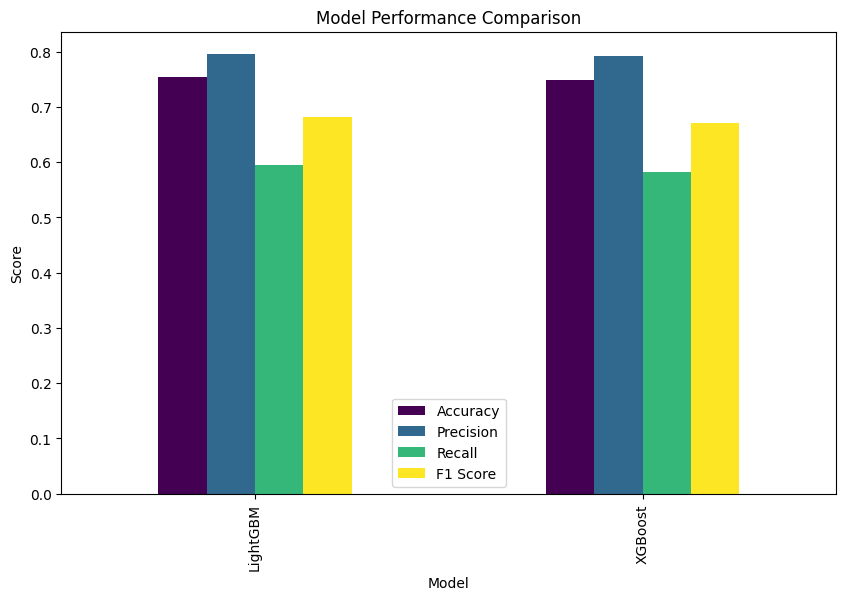

In [64]:
results.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

In [76]:
df_test=pd.read_csv('/content/Titanic_test.csv')

In [77]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
df_test=pd.get_dummies(df_test,columns=['Sex','Embarked'])
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,False,True,False,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,True,False,True,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,True,False,False,True
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,False,True,False,False,True


In [79]:
# drop unneccessary columns
df_test.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,True,False,True,False
1,893,3,47.0,1,0,7.0000,True,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,False,True,False
3,895,3,27.0,0,0,8.6625,False,True,False,False,True
4,896,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,False,True,False,False,True
414,1306,1,39.0,0,0,108.9000,True,False,True,False,False
415,1307,3,38.5,0,0,7.2500,False,True,False,False,True
416,1308,3,NaN,0,0,8.0500,False,True,False,False,True


In [83]:
scaler=StandardScaler()
x3=scaler.fit_transform(df_test)

In [84]:
df_test=pd.DataFrame(x3,columns=df_test.columns)

In [86]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.727912,0.873482,0.298549,-0.499470,-0.400248,-0.497811,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,-1.719625,0.873482,1.181328,0.616992,-0.400248,-0.512660,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-1.711337,-0.315819,2.240662,-0.499470,-0.400248,-0.464532,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,-1.703050,0.873482,-0.231118,-0.499470,-0.400248,-0.482888,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,-1.694763,0.873482,-0.584229,0.616992,0.619896,-0.417971,1.322876,-1.322876,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,NaN,-0.499470,-0.400248,-0.493856,-0.755929,0.755929,-0.568142,-0.351647,0.740370
414,1.703050,-1.505120,0.616350,-0.499470,-0.400248,1.312180,1.322876,-1.322876,1.760125,-0.351647,-1.350676
415,1.711337,0.873482,0.581038,-0.499470,-0.400248,-0.508183,-0.755929,0.755929,-0.568142,-0.351647,0.740370
416,1.719625,0.873482,NaN,-0.499470,-0.400248,-0.493856,-0.755929,0.755929,-0.568142,-0.351647,0.740370


In [87]:
predict1=xgb_model.predict(df_test)
predict1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
predict2=lgb_model.predict(df_test)
predict2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,